# Tugas 1 Mata Kuliah Rekayasa Data: Q-Q Plot

### Nama: Rayhan Adi Wicaksono
### NIM:  21/477186/TK/52550

=================================================================================================================

## Pendahuluan

Q-Q plot (Quantile-Quantile Plot) merupakan salah satu teknik statistika yang digunakan untuk mengetahui apakah suatu set data mengikuti suatu theoritical distribution seperti Normal distribution atau Uniform distribution. Selain itu, Q-Q plot juga dapat digunakan untuk mengetahui apakah dua set data memiliki distribusi yang serupa.

Q-Q plot dilihat dengan cara plotting Quantile dari dua set data atau antara satu set data dengan theoritical distribution. Ketika hasil plot dari dua set data membentuk atau mendekati garis lurus 45 derajat dari sumbu x, maka hal tersebut menandakan bahwa dua set data tersebut memiliki distribusi yang serupa. Adapun ketika hasil plot tidak membentuk garis lurus, tetapi membentuk lengkungan, maka hal tersebut menandakan bahwa Quantiles dari salah satu set data lebih kecil dari set data yang lainnya. Hal tersebut menandakan bahwa nilai dari salah satu set data yang Quantiles-nya lebih kecil cenderung lebih kecil dari set data lainnya.

## Penjelasan dan Import Dataset

Pada penugasan kali ini, saya menggunakan dataset Abalone yang berisikan feature berupa ukuran fisik Abalone. Dataset yang digunakan bersumber dari link berikut.

https://archive.ics.uci.edu/dataset/1/abalone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Pada Penugasan kali ini, saya akan memilih dua feature dari dataset tersebut untuk diuji apakah kedua feature tersebut memiliki distribusi yang serupa. Disini saya akan memilih feature **Length** dan **Whole weight** untuk diuji.

In [23]:
df = df[['Length','Whole weight']]
df.head()

,Length,Whole weight
0,0.455,0.5140
1,0.350,0.2255
2,0.530,0.6770
3,0.440,0.5160
4,0.330,0.2050


## Pembuatan Q-Q Plot dan Analisis

Selanjutnya, kedua feature yang dipilih akan dibandingkan satu sama lain pada Q-Q Plot. Pada penugasan ini, digunakan bantuan library statsmodels untuk membuat Q-Q plot.

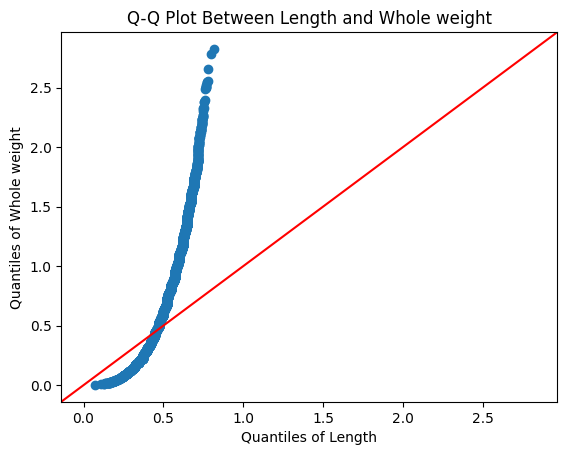

In [6]:
import statsmodels.api as sm

# Membuat Q-Q Plot dengan garis 45 derajat sebagai acuan
sm.qqplot_2samples(df['Length'], df['Whole weight'], line='45')
plt.xlabel('Quantiles of Length')
plt.ylabel('Quantiles of Whole weight')
plt.title('Q-Q Plot Between Length and Whole weight')
plt.show()

Berdasarkan hasil plot tersebut, dapat dilihat bahwa plot tidak membentuk garis lurus, melainkan membentuk lengkungan. Hal ini menunjukkan bahwa Quantiles dari Feature Length bernilai lebih kecil dari Quantiles Feature Whole weight. Hal tersebut juga menandakan bahwa distribusi dari kedua feature tersebut tidaklah sama.